In [1]:
import numpy as np

In [11]:
X = np.array([1, 1.4, 2.5])
w = np.array([0.4, 0.3, 0.5])

def net_input(X, w):
    return np.dot(X, w)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))
    
def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

p = logistic_activation(X, w)
print('P(y=1|x) =', p)

P(y=1|x) = 0.8879529614430097


In [22]:
A = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])
b = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(A, b[0])
print('net_input:', Z)
y_probas = logistic(Z)
print('probas:', y_probas)

net_input: [1.78 0.76 1.65]
probas: [0.85569687 0.68135373 0.83889105]


In [25]:
y_class = np.argmax(Z, axis=0)
y_class

0

In [27]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print(sum(y_probas))
y_probas

1.0


array([0.44668973, 0.16107406, 0.39223621])

In [29]:
import tensorflow as tf
Z_tensor = tf.expand_dims(Z, axis=0)
print(Z_tensor)

tf.keras.activations.softmax(Z_tensor)

tf.Tensor([[1.78 0.76 1.65]], shape=(1, 3), dtype=float64)


<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[0.44668973, 0.16107406, 0.39223621]])>

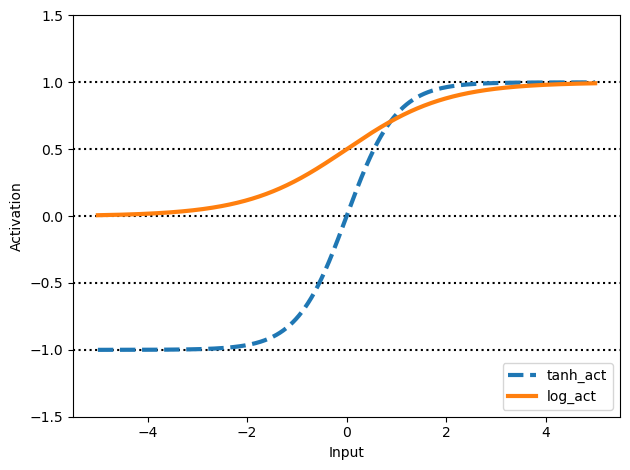

In [33]:
import matplotlib.pyplot as plt

def tanh(z):
    e_pos = np.exp(z)
    e_neg = np.exp(-z)
    return (e_pos - e_neg) / (e_pos + e_neg)

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)

plt.ylim([-1.5, 1.5])
plt.xlabel('Input')
plt.ylabel('Activation')

hlines = [1, 0.5, 0, -0.5, -1]
for hline in hlines:
    plt.axhline(hline, color='black', linestyle=':')

plt.plot(z, tanh_act, linewidth=3, linestyle='--', label='tanh_act')
plt.plot(z, log_act, linewidth=3, label='log_act')
plt.legend(loc='lower right')
plt.tight_layout()

In [37]:
print(tanh_act)
print(np.tanh(z))
print(tf.keras.activations.tanh(z))

[-0.9999092  -0.99990829 -0.99990737 ...  0.99990644  0.99990737
  0.99990829]
[-0.9999092  -0.99990829 -0.99990737 ...  0.99990644  0.99990737
  0.99990829]
tf.Tensor(
[-0.9999092  -0.99990829 -0.99990737 ...  0.99990644  0.99990737
  0.99990829], shape=(2000,), dtype=float64)


In [38]:
print(log_act)
print(tf.keras.activations.sigmoid(z))

[0.00669285 0.00672617 0.00675966 ... 0.99320669 0.99324034 0.99327383]
tf.Tensor([0.00669285 0.00672617 0.00675966 ... 0.99320669 0.99324034 0.99327383], shape=(2000,), dtype=float64)


In [39]:
tf.keras.activations.relu(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=array([0.   , 0.   , 0.   , ..., 4.985, 4.99 , 4.995])>